In [ ]:
import os
import shutil
import random

def split_dataset(dataset_path, output_path, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):


    if not os.path.exists(dataset_path):
        print(f"Error: Dataset path '{dataset_path}' does not exist.")
        return

    os.makedirs(output_path, exist_ok=True)

    for subfolder in os.listdir(dataset_path):
        subfolder_path = os.path.join(dataset_path, subfolder)

        if os.path.isdir(subfolder_path):
            train_dir = os.path.join(output_path, subfolder, 'train')
            val_dir = os.path.join(output_path, subfolder, 'val')
            test_dir = os.path.join(output_path, subfolder, 'test')

            os.makedirs(train_dir, exist_ok=True)
            os.makedirs(val_dir, exist_ok=True)
            os.makedirs(test_dir, exist_ok=True)

            image_files = [f for f in os.listdir(subfolder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

            if not image_files:
                print(f"Warning: No image files found in subfolder '{subfolder}'.")
                continue

            random.shuffle(image_files)

            num_images = len(image_files)
            num_train = int(num_images * train_ratio)
            num_val = int(num_images * val_ratio)

            train_files = image_files[:num_train]
            val_files = image_files[num_train:num_train + num_val]
            test_files = image_files[num_train + num_val:]

            def copy_files(files, dest_dir):
                for file in files:
                    src_path = os.path.join(subfolder_path, file)
                    dest_path = os.path.join(dest_dir, file)
                    shutil.copy2(src_path, dest_path)

            copy_files(train_files, train_dir)
            copy_files(val_files, val_dir)
            copy_files(test_files, test_dir)

            print(f"Subfolder '{subfolder}' split successfully:")
            print(f"  Train: {len(train_files)} images")
            print(f"  Validation: {len(val_files)} images")
            print(f"  Test: {len(test_files)} images")

dataset_path = 'D:\\Dissertation-Project\\Projects\\datasets\\original_datasets'
output_path = 'D:\\Dissertation-Project\\Projects\\datasets\\split_datasets'
split_dataset(dataset_path, output_path)

Subfolder 'female' split successfully:
  Train: 146 images
  Validation: 31 images
  Test: 32 images
Subfolder 'male' split successfully:
  Train: 135 images
  Validation: 28 images
  Test: 30 images


In [ ]:
from ultralytics import YOLO

# Load YOLO classification model
model = YOLO("yolo11n-cls.pt")

# Train the model
results = model.train(
    data="D:\\Dissertation-Project\\Projects\\datasets\\split_datasets",
    epochs=100,
    imgsz=224,
    batch=16,
    patience=50,
)

Ultralytics 8.3.70  Python-3.11.9 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
engine\trainer: task=classify, mode=train, model=yolo11n-cls.pt, data=D:\Dissertation-Project\Projects\datasets\split_datasets, epochs=100, time=None, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fal

train: Scanning D:\Dissertation-Project\Projects\datasets\split_datasets\train... 277 images, 0 corrupt: 100%|██████████| 277/277 [00:00<?, ?it/s]
val: Scanning D:\Dissertation-Project\Projects\datasets\split_datasets\val... 58 images, 0 corrupt: 100%|██████████| 58/58 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 224 train, 224 val
Using 8 dataloader workers
Logging results to C:\Users\USER\runs\classify\train
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100      0.47G      0.496          5        224: 100%|██████████| 18/18 [00:22<00:00,  1.28s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all       0.81          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100     0.495G     0.2151          5        224: 100%|██████████| 18/18 [00:03<00:00,  5.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.09it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100     0.493G     0.1176          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.12it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100     0.478G    0.09572          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.59it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


      5/100     0.484G     0.2083          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.89it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100     0.484G     0.3236          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.77it/s]

                   all      0.948          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100     0.478G     0.1848          5        224: 100%|██████████| 18/18 [00:02<00:00,  7.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.59it/s]

                   all      0.948          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100     0.484G     0.1467          5        224: 100%|██████████| 18/18 [00:02<00:00,  7.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.23it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100     0.478G     0.2061          5        224: 100%|██████████| 18/18 [00:02<00:00,  7.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.02it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100     0.484G     0.2187          5        224: 100%|██████████| 18/18 [00:02<00:00,  7.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.24it/s]

                   all      0.948          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100     0.478G     0.2108          5        224: 100%|██████████| 18/18 [00:02<00:00,  7.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.19it/s]

                   all      0.948          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100     0.484G      0.134          5        224: 100%|██████████| 18/18 [00:02<00:00,  7.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.72it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100     0.478G     0.1938          5        224: 100%|██████████| 18/18 [00:02<00:00,  7.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.26it/s]

                   all      0.931          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100     0.484G     0.1707          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.62it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100     0.478G     0.3026          5        224: 100%|██████████| 18/18 [00:02<00:00,  7.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.61it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100     0.484G     0.1585          5        224: 100%|██████████| 18/18 [00:02<00:00,  7.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.45it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100     0.478G     0.1857          5        224: 100%|██████████| 18/18 [00:02<00:00,  7.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.72it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100     0.484G     0.1162          5        224: 100%|██████████| 18/18 [00:02<00:00,  7.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.08it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     19/100     0.478G    0.08434          5        224: 100%|██████████| 18/18 [00:02<00:00,  7.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.15it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100     0.484G     0.1708          5        224: 100%|██████████| 18/18 [00:02<00:00,  7.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.50it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     21/100     0.478G     0.1005          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.52it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     22/100     0.484G    0.06776          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.20it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     23/100     0.478G     0.1462          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.65it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     24/100     0.484G    0.08334          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.97it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100     0.478G     0.0501          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.06it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     26/100     0.484G    0.09894          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.49it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     27/100     0.478G    0.09252          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.77it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     28/100     0.484G    0.07821          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.97it/s]


                   all      0.966          1

      Epoch    GPU_mem       loss  Instances       Size


     29/100     0.478G    0.05819          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.54it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     30/100     0.484G     0.1215          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 11.58it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     31/100     0.478G     0.1851          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.90it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     32/100     0.484G    0.09131          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.01it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     33/100     0.478G    0.06823          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.56it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     34/100     0.484G    0.05924          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.80it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     35/100     0.478G    0.09271          5        224: 100%|██████████| 18/18 [00:02<00:00,  7.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.69it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     36/100     0.484G     0.1033          5        224: 100%|██████████| 18/18 [00:02<00:00,  7.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.70it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     37/100     0.478G    0.06419          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.61it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     38/100     0.484G    0.07172          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.09it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     39/100     0.478G    0.06901          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.59it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     40/100     0.484G     0.0622          5        224: 100%|██████████| 18/18 [00:02<00:00,  7.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.65it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     41/100     0.478G    0.05677          5        224: 100%|██████████| 18/18 [00:02<00:00,  7.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.94it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     42/100     0.484G    0.03429          5        224: 100%|██████████| 18/18 [00:02<00:00,  7.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.93it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     43/100     0.478G    0.02878          5        224: 100%|██████████| 18/18 [00:02<00:00,  7.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.68it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     44/100     0.484G    0.03266          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.93it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     45/100     0.478G     0.0473          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.08it/s]

                   all      0.948          1



      Epoch    GPU_mem       loss  Instances       Size


     46/100     0.484G    0.06999          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.32it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     47/100     0.478G    0.03419          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.57it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     48/100     0.484G    0.06814          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.60it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     49/100     0.478G    0.04217          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.02it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     50/100     0.484G     0.0373          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.42it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     51/100     0.478G    0.03972          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.62it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     52/100     0.484G    0.03821          5        224: 100%|██████████| 18/18 [00:03<00:00,  5.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.43it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     53/100     0.478G     0.0483          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.16it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     54/100     0.484G    0.01589          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.42it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     55/100     0.478G    0.02656          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.38it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     56/100     0.484G    0.02919          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.09it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     57/100     0.478G    0.03608          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.35it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     58/100     0.484G    0.03645          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 11.97it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     59/100     0.478G     0.0187          5        224: 100%|██████████| 18/18 [00:03<00:00,  5.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00,  9.21it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     60/100     0.484G    0.03712          5        224: 100%|██████████| 18/18 [00:03<00:00,  5.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.30it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     61/100     0.478G     0.0219          5        224: 100%|██████████| 18/18 [00:03<00:00,  5.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.18it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     62/100     0.484G    0.02431          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.85it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     63/100     0.478G    0.03155          5        224: 100%|██████████| 18/18 [00:03<00:00,  5.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.73it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     64/100     0.484G     0.0312          5        224: 100%|██████████| 18/18 [00:03<00:00,  5.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.44it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     65/100     0.478G    0.01512          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.43it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     66/100     0.484G    0.02434          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.94it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     67/100     0.478G     0.0228          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.91it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     68/100     0.484G    0.01709          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.81it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     69/100     0.478G    0.01737          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.40it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     70/100     0.484G     0.0204          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.92it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     71/100     0.478G    0.01222          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.95it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     72/100     0.484G    0.02045          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 11.39it/s]


                   all          1          1

      Epoch    GPU_mem       loss  Instances       Size


     73/100     0.478G    0.01148          5        224: 100%|██████████| 18/18 [00:03<00:00,  5.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.73it/s]


                   all          1          1

      Epoch    GPU_mem       loss  Instances       Size


     74/100     0.484G    0.02698          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 27.39it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     75/100     0.478G    0.04964          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.42it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     76/100     0.484G    0.02373          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.53it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     77/100     0.478G    0.01859          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.39it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     78/100     0.484G    0.03938          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.26it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     79/100     0.478G    0.02691          5        224: 100%|██████████| 18/18 [00:02<00:00,  7.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.46it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     80/100     0.484G    0.03554          5        224: 100%|██████████| 18/18 [00:02<00:00,  7.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.87it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     81/100     0.478G    0.02632          5        224: 100%|██████████| 18/18 [00:02<00:00,  7.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.87it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     82/100     0.484G    0.01428          5        224: 100%|██████████| 18/18 [00:02<00:00,  7.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.56it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     83/100     0.478G      0.036          5        224: 100%|██████████| 18/18 [00:02<00:00,  7.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.01it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     84/100     0.484G    0.05585          5        224: 100%|██████████| 18/18 [00:02<00:00,  7.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.18it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     85/100     0.478G     0.0168          5        224: 100%|██████████| 18/18 [00:02<00:00,  7.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.73it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     86/100     0.484G   0.009939          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.17it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     87/100     0.478G    0.01075          5        224: 100%|██████████| 18/18 [00:02<00:00,  7.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.25it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     88/100     0.484G    0.04899          5        224: 100%|██████████| 18/18 [00:02<00:00,  7.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.25it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     89/100     0.478G    0.01823          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.26it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     90/100     0.484G    0.08577          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.18it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     91/100     0.478G    0.01013          5        224: 100%|██████████| 18/18 [00:14<00:00,  1.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.93it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     92/100     0.484G    0.01679          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.38it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     93/100     0.478G      0.311          5        224: 100%|██████████| 18/18 [00:02<00:00,  7.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.32it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     94/100     0.484G   0.009525          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.59it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     95/100     0.478G    0.02062          5        224: 100%|██████████| 18/18 [00:02<00:00,  7.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.12it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     96/100     0.484G    0.01289          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.77it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     97/100     0.478G   0.006339          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.20it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     98/100     0.484G   0.007382          5        224: 100%|██████████| 18/18 [00:02<00:00,  7.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.46it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     99/100     0.478G    0.01486          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.77it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    100/100     0.484G    0.00926          5        224: 100%|██████████| 18/18 [00:02<00:00,  6.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.09it/s]

                   all          1          1



100 epochs completed in 0.121 hours.
Optimizer stripped from C:\Users\USER\runs\classify\train\weights\last.pt, 3.2MB
Optimizer stripped from C:\Users\USER\runs\classify\train\weights\best.pt, 3.2MB

Validating C:\Users\USER\runs\classify\train\weights\best.pt...
Ultralytics 8.3.70  Python-3.11.9 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
YOLO11n-cls summary (fused): 112 layers, 1,528,586 parameters, 0 gradients, 3.2 GFLOPs
train: D:\Dissertation-Project\Projects\datasets\split_datasets\train... found 277 images in 2 classes  
val: D:\Dissertation-Project\Projects\datasets\split_datasets\val... found 58 images in 2 classes  
test: D:\Dissertation-Project\Projects\datasets\split_datasets\test... found 60 images in 2 classes  


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.56it/s]


                   all          1          1
Speed: 0.1ms preprocess, 1.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to C:\Users\USER\runs\classify\train


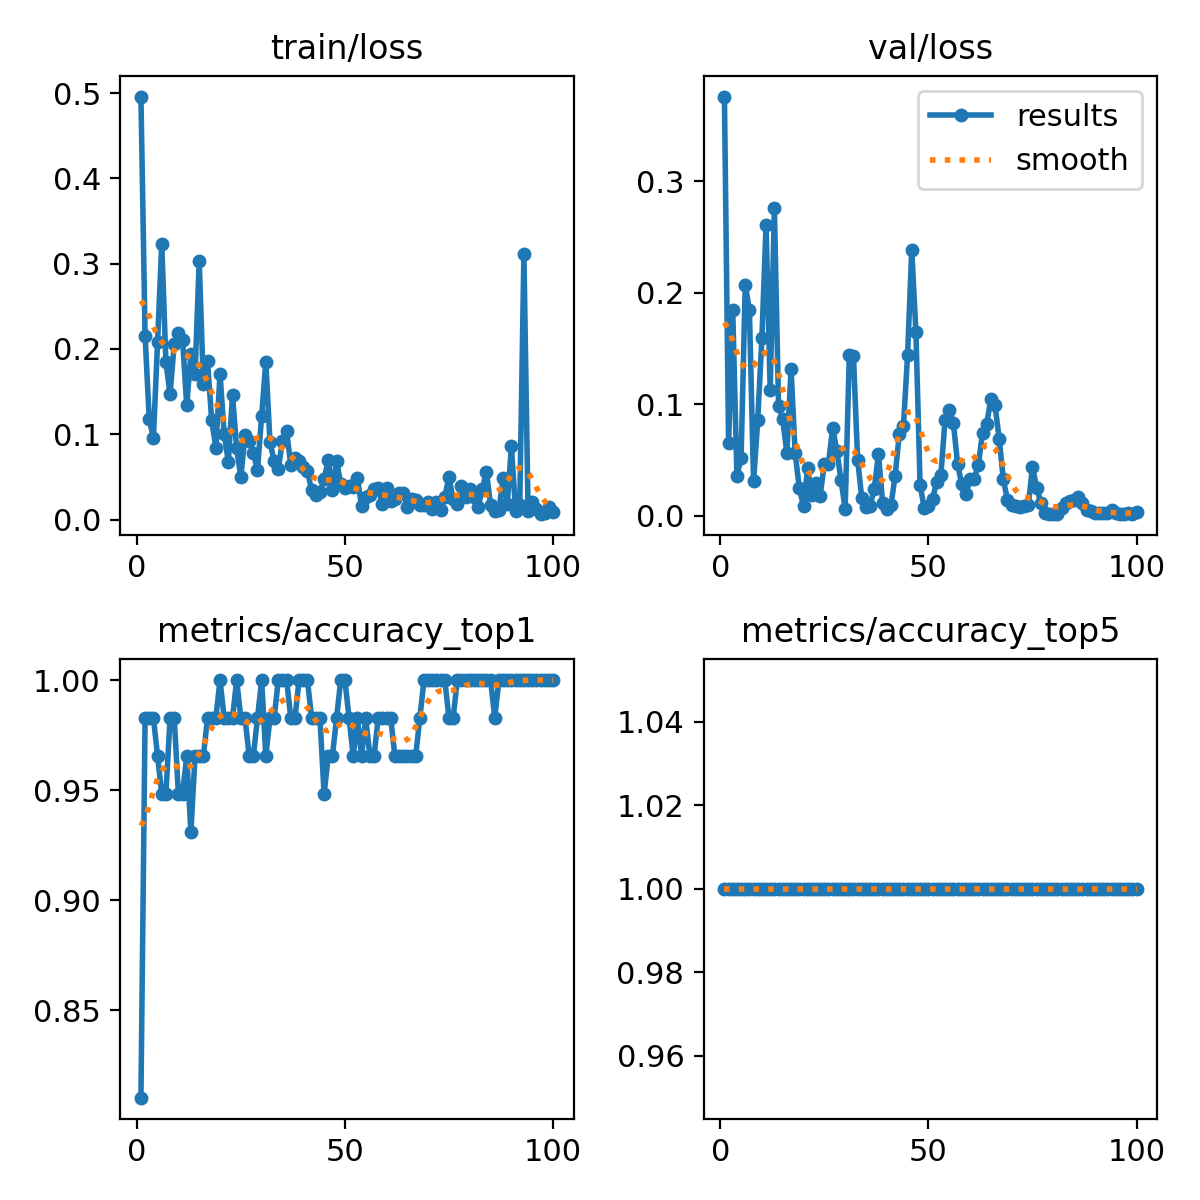

In [5]:
from IPython.display import Image

Image("D:\\Dissertation-Project\\Projects\\code\\runs\\classify\\train\\results.png", width=640)

In [ ]:
custom_model = YOLO("D:\\Dissertation-Project\\Projects\\code\\best.pt")

In [ ]:
test_folder = "D:\\Dissertation-Project\\Projects\\code\\test\\merged"
results_folder = "C:\\Users\\USER\\runs\\classify\\results"
import os

test_list = os.listdir(test_folder)

for i,j in enumerate(test_list):
    
    predictions = model.predict(f"{test_folder}\\{j}",save=True,project=results_folder,name="output",exist_ok=True)


image 1/1 D:\Dissertation-Project\Projects\code\test\merged\female_10.jpg: 224x224 female 1.00, male 0.00, 16.4ms
Speed: 30.5ms preprocess, 16.4ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
Results saved to C:\Users\USER\runs\classify\results\output

image 1/1 D:\Dissertation-Project\Projects\code\test\merged\female_11.jpg: 224x224 female 1.00, male 0.00, 15.5ms
Speed: 28.1ms preprocess, 15.5ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
Results saved to C:\Users\USER\runs\classify\results\output

image 1/1 D:\Dissertation-Project\Projects\code\test\merged\female_113.jpg: 224x224 female 1.00, male 0.00, 14.7ms
Speed: 27.5ms preprocess, 14.7ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
Results saved to C:\Users\USER\runs\classify\results\output

image 1/1 D:\Dissertation-Project\Projects\code\test\merged\female_118.jpg: 224x224 female 1.00, male 0.00, 15.0ms
Speed: 28.0ms preprocess, 15.0ms inference, 0.0ms postprocess pe

In [8]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("D:\\Dissertation-Project\\Projects\\code\\best.pt")
model.eval()

YOLO(
  (model): ClassificationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running

In [23]:
print(results)

[ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: 'female', 1: 'male'}
obb: None
orig_img: array([[[91, 91, 95],
        [91, 91, 95],
        [89, 89, 93],
        ...,
        [83, 79, 85],
        [83, 81, 87],
        [85, 83, 87]],

       [[91, 91, 95],
        [91, 91, 95],
        [89, 89, 93],
        ...,
        [83, 79, 85],
        [85, 81, 87],
        [85, 81, 87]],

       [[91, 91, 95],
        [89, 89, 95],
        [89, 89, 93],
        ...,
        [83, 79, 85],
        [87, 83, 89],
        [87, 83, 89]],

       ...,

       [[73, 69, 75],
        [73, 69, 75],
        [71, 67, 73],
        ...,
        [87, 83, 89],
        [85, 81, 87],
        [87, 83, 89]],

       [[71, 67, 73],
        [71, 67, 73],
        [73, 69, 75],
        ...,
        [85, 81, 87],
        [85, 81, 87],
        [85, 81, 87]],

       [[71, 67, 73],
        [71, 67, 73],
        [71, 67, 73],
        ...,
        [85, 81, 85]

In [ ]:
from ultralytics import YOLO
import os
import numpy as np

model = YOLO('D:\\Dissertation-Project\\Projects\\code\\best.pt')

img_dir = 'D:\\Dissertation-Project\\Projects\\datasets\\split_datasets\\test\\merged'

true_labels = []
pred_scores = []

class_map = {'female': 0, 'male': 1}

for img_name in os.listdir(img_dir):
    if img_name.endswith('.jpg'):
        img_path = os.path.join(img_dir, img_name)

        if 'female' in img_name:
            true_label = 0
        elif 'male' in img_name:
            true_label = 1
        else:
            continue

        results = model(img_path, verbose=False)[0]
        probs = results.probs.data.cpu().numpy()

        true_labels.append(true_label)
        pred_scores.append(probs[1])


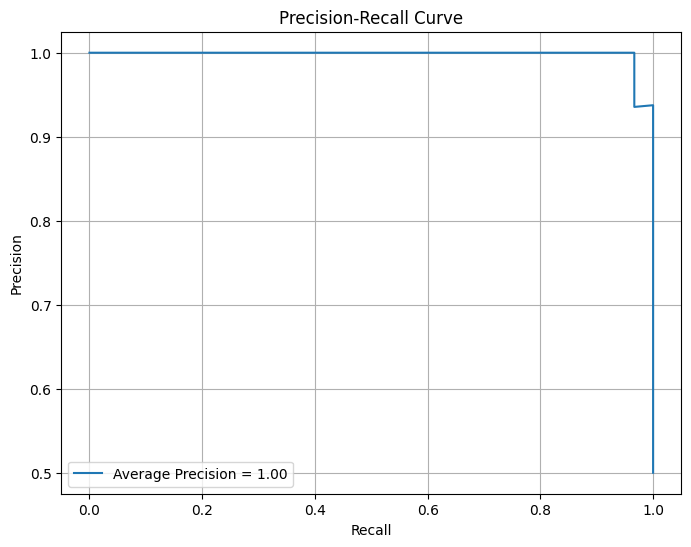

In [12]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(true_labels, pred_scores)
ap_score = average_precision_score(true_labels, pred_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Average Precision = {ap_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

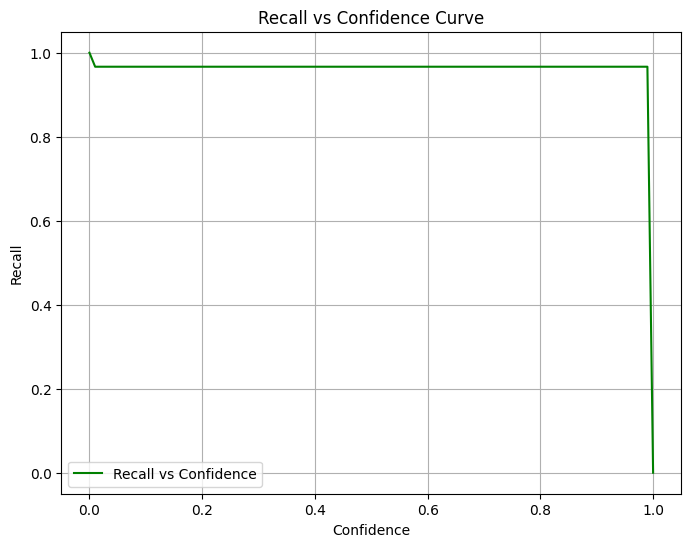

In [11]:
from sklearn.metrics import recall_score

# Convert lists to numpy arrays
true_labels = np.array(true_labels)
pred_scores = np.array(pred_scores)

# Define thresholds from 0 to 1
thresholds = np.linspace(0, 1, 100)
recall_values = []

# Loop over thresholds to compute recall at each
for thresh in thresholds:
    # Predicted labels: class 1 if score > threshold else 0
    pred_labels = (pred_scores > thresh).astype(int)
    
    # Compute recall
    recall = recall_score(true_labels, pred_labels, zero_division=0)
    recall_values.append(recall)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(thresholds, recall_values, color='green', label='Recall vs Confidence')
plt.xlabel('Confidence')
plt.ylabel('Recall')
plt.title('Recall vs Confidence Curve')
plt.grid(True)
plt.legend(loc='lower left')
plt.show()


In [1]:
import platform
import torch
import os
import psutil
import sys
import subprocess

def get_gpu_info():
    if torch.cuda.is_available():
        gpu_name = torch.cuda.get_device_name(0)
        total_mem = torch.cuda.get_device_properties(0).total_memory // (1024 ** 2)
        return f"{gpu_name} ({total_mem} MB VRAM)"
    else:
        return "No GPU detected"

def get_ram_info():
    ram = psutil.virtual_memory().total // (1024 ** 3)
    return f"{ram} GB RAM"

def get_python_packages():
    try:
        yolo_version = subprocess.check_output([sys.executable, "-m", "pip", "show", "ultralytics"]).decode()
        yolo_version = [line for line in yolo_version.splitlines() if "Version" in line][0]
    except:
        yolo_version = "Ultralytics YOLO not installed"
    return {
        "Python": platform.python_version(),
        "PyTorch": torch.__version__,
        "Ultralytics YOLO": yolo_version,
    }

def get_os_info():
    return f"{platform.system()} {platform.release()} ({platform.version()})"

# Gather and print all system info
print("System Environment Info")
print("-" * 40)
print("Operating System:", get_os_info())
print("Python Version:", platform.python_version())
print("PyTorch Version:", torch.__version__)
print("GPU:", get_gpu_info())
print("RAM:", get_ram_info())
print("Ultralytics YOLO Version:", get_python_packages()['Ultralytics YOLO'])


System Environment Info
----------------------------------------
Operating System: Windows 10 (10.0.26100)
Python Version: 3.11.9
PyTorch Version: 2.6.0+cu118
GPU: NVIDIA GeForce GTX 1650 (4095 MB VRAM)
RAM: 11 GB RAM
Ultralytics YOLO Version: Version: 8.3.70


FileUpload(value=(), accept='image/*', description='Upload')

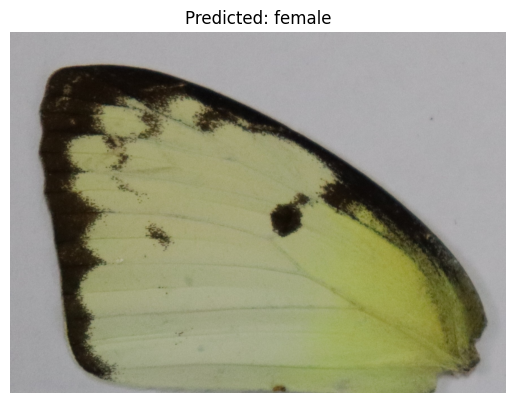

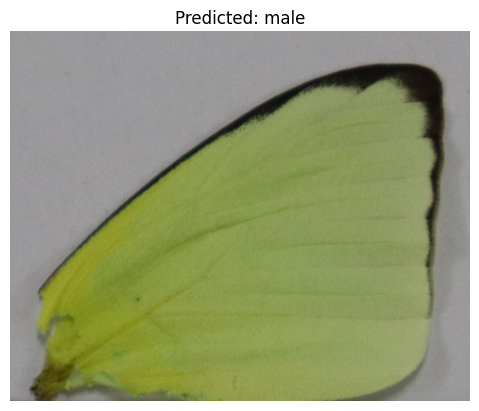

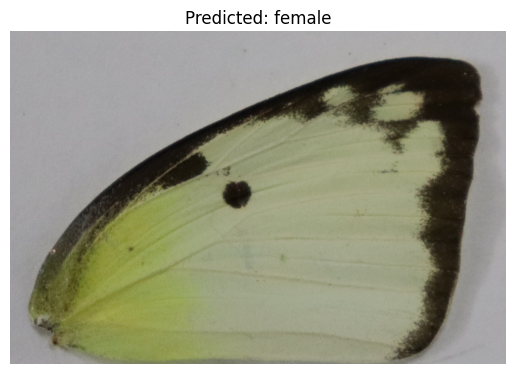

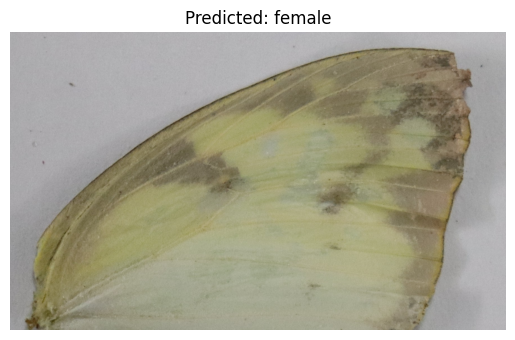

In [1]:
from ultralytics import YOLO
from PIL import Image
import torch
import io
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from torchvision import transforms

# Step 1: Upload widget
uploader = widgets.FileUpload(accept='image/*', multiple=False)
display(uploader)

# Step 2: Prediction callback
def on_upload_change(change):
    if uploader.value:
        file_info = uploader.value[0]
        image_data = file_info['content']
        image = Image.open(io.BytesIO(image_data)).convert("RGB")

        # Step 3: Resize to 224x224 (YOLOv11n-cls requirement)
        transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
        ])
        input_tensor = transform(image).unsqueeze(0)

        # Step 4: Load model via Ultralytics
        model_path = r"D:\Dissertation-Project\Projects\code\best.pt"
        model = YOLO(model_path)
        model.fuse()

        # Step 5: Make prediction
        results = model.predict(image, imgsz=224, device="cpu", verbose=False)
        pred_class = int(results[0].probs.top1)

        # Step 6: Output label
        label = "male" if pred_class == 1 else "female"
        print(f"Predicted class: {label}")

        # Step 7: Display image
        plt.imshow(image)
        plt.title(f"Predicted: {label}")
        plt.axis("off")
        plt.show()

# Step 3: Register callback
uploader.observe(on_upload_change, names='value')